# Análise exploratória de dados da Olist
Neste projeto, realizarei uma análise exploratória de dados no conjunto de dados Olist do Kaggle. Algumas questões/hipóteses de negócio serão formuladas e tentarei respondê-las.

Sobre o conjunto de dados:

Este é um conjunto de dados público de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Suas características permitem visualizar um pedido a partir de várias dimensões: desde o status do pedido, preço, desempenho de pagamento e frete até a localização do cliente, atributos do produto e, finalmente, análises escritas pelos clientes. Também foi lançado um conjunto de dados de geolocalização que relaciona os códigos postais brasileiros a coordenadas de latitude/longitude.

Contexto:

Este conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos nos marketplaces brasileiros. A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente para os clientes usando os parceiros logísticos da Olist. Saiba mais em seu site: www.olist.com

Após um cliente comprar o produto da Olist Store, um vendedor é notificado para atender ao pedido. Assim que o cliente recebe o produto, ou a data de entrega estimada expira, o cliente recebe uma pesquisa de satisfação por e-mail, onde pode atribuir uma nota para a experiência de compra e escrever alguns comentários.

#### Perguntas de negócio a serem respondidas
1. Qual o preço médio dos produtos comprados?
2. Qual o valor médio pago por pedido?
3. Em quantas parcelas, em média, os pedidos são parcelados?
4. Quais estados vendem mais? (número de pedidos e valor médio)
5. Quais cidades vendem mais?
6. Quais as categorias de item mais vendidas?
7. Quais as categorias de item mais vendidas por região?
8. Quais as categorias de item mais caras e mais baratas em média?
9. Qual o número médio de itens por pedido?
10. Onde estão localizados os clientes?
11. Onde estão localizados os vendedores?
12. Qual o número médio de parcelas no pagamento, por região?
13. Como se dá a evolução das vendas ao longo do tempo?
14. Como se dá a evolução das vendas ao longo do dia? Em quais horários são feitos mais pedidos?
15. Como se dá a evolução das vendas ao longo da semana? Em quais dias da semana são feitos mais pedidos?
16. Existe alguma correlação entre o valor pago em um pedido e o número de parcelas escolhido para o pagamento?

#### 0.0 Importando as bibliotecas

In [70]:
# Visualização e manipulação de dados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

#### 1.0 Coletando os dados

In [71]:
customers_path = '../Olist/input/olist_customers_dataset.csv'
geolocation_path = '../Olist/input/olist_geolocation_dataset.csv'
items_path = '../Olist/input/olist_order_items_dataset.csv'
payments_path = '../Olist/input/olist_order_payments_dataset.csv'
reviews_path = '../Olist/input/olist_order_reviews_dataset.csv'
orders_path = '../Olist/input/olist_orders_dataset.csv'
products_path = '../Olist/input/olist_products_dataset.csv'
sellers_path = '../Olist/input/olist_sellers_dataset.csv'
category_path = '../Olist/input/product_category_name_translation.csv'

customers = pd.read_csv(customers_path)
geolocation = pd.read_csv(geolocation_path)
items = pd.read_csv(items_path)
payments = pd.read_csv(payments_path)
reviews = pd.read_csv(reviews_path)
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path)
sellers = pd.read_csv(sellers_path)
category = pd.read_csv(category_path)

#### 1.1 Schema do banco de dados
<img src="reports/schemaOlist.png" height=500>

#### 1.2 Unindo os dados em diversas tabela
- Abaixo, unirei os dados em tabelas contendo informação completa acerca de determinado elemento, como por exemplo, pedidos.

#### 1.3 Customers data
- customer_id é um id gerado a cada vez que o cliente faz um pedido.
- customer_unique_id é um id que identifica individualmente cada cliente, atribuído no cadastro.
- customers e geolocation são unidos através da chave zip_code_prefix.
- Customers tem 100.000 linhas, enquanto geolocation tem 1.000.000 de linhas e zipcodes duplicados. Isso indica que um zipcode possui várias localizações de latitude e longitude. Estratégia - agrupar os zipcodes, obtendo a média/centroide de latitude e longitude.
- Selecionarei apenas as colunas de latitude e longitude pois cidade e estado do cliente já estão presentes no dataset customers.

In [72]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [73]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [74]:
geolocation_grouped = geolocation.groupby(['geolocation_zip_code_prefix'])[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
customer_data = pd.merge(left=customers, right=geolocation_grouped, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns=['geolocation_zip_code_prefix', 'customer_zip_code_prefix'])
customer_data.head()

,customer_id,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.975100,-47.142925


#### 1.4 Item data
- Irei unir os datasets orders e items. Então, irei uni-lo com customers, a fim de obter estado e cidade de onde o item foi pedido. Finalmente, irei unir tudo com o dataset products, a fim de obter a categoria de cada item.
- De posse desse dataset, será possível responder perguntas como "Quais as três categorias de item mais vendidas por região do país?".
- Um pedido pode conter múltiplos itens. Portanto, no dataset items, o order_id contém duplicados, indicando múltiplos itens de um mesmo pedido.
- Das colunas contendo informação temporal, selecionarei apenas a que indica a data e horário do pedido, pois é a que será interessante para a análise. Poderemos investigar, por exemplo, em quais datas ocorreram maiores vendas e etc.

In [75]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [76]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [77]:
items['order_id'].duplicated().sum()

13984

In [78]:
orders.shape, items.shape

((99441, 8), (112650, 7))

In [79]:
item_data = pd.merge(left=orders, right=items, on='order_id', how='inner').drop(columns=['freight_value','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'seller_id', 'order_status', 'order_item_id'])
item_data = pd.merge(left=item_data, right=customers, how='inner', on='customer_id').drop(columns=['customer_id', 'customer_zip_code_prefix'])
item_data = pd.merge(left=item_data, right=products, on='product_id', how='inner').drop(columns=[x for x in products.columns if x not in set(['product_id', 'product_category_name'])])
item_data.head()

,order_id,order_purchase_timestamp,product_id,price,customer_unique_id,customer_city,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,87285b34884572647811a353c7ac498a,29.99,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,87285b34884572647811a353c7ac498a,29.99,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,87285b34884572647811a353c7ac498a,29.99,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,af07308b275d755c9edb36a90c618231,barreiras,BA,perfumaria


#### 1.5 Seller data
- Pode ser interessante para a análise obter, para cada pedido, o vendedor, sua localização, data de envio e entrega, e o cliente, também localizado.

In [80]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [81]:
sellers.shape

(3095, 4)

In [82]:
sellers_geoloc = pd.merge(left=sellers, right=geolocation_grouped, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns=['seller_zip_code_prefix', 'geolocation_zip_code_prefix'])
sellers_orders_geoloc = pd.merge(left=items, right=sellers_geoloc, on='seller_id', how='left').drop(columns=['order_item_id', 'product_id', 'price', 'freight_value'])
sellers_orders_geoloc = pd.merge(left=sellers_orders_geoloc, right=orders, on='order_id', how='inner').drop(columns=['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date'])
seller_data = pd.merge(left=sellers_orders_geoloc, right=customer_data, on='customer_id', how='inner').drop(columns=['customer_id']).rename(columns={'geolocation_lat_x': 'seller_lat', 'geolocation_lng_x': 'seller_lng', 'geolocation_lat_y': 'customer_lat', 'geolocation_lng_y': 'customer_lng'})
seller_data.head()

,order_id,seller_id,seller_city,seller_state,seller_lat,seller_lng,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,-22.496953,-44.127492,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,SP,-23.565096,-46.518565,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,borda da mata,MG,-22.262584,-46.171124,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,franca,SP,-20.553624,-47.387359,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,loanda,PR,-22.929384,-53.135873,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,-23.243402,-46.827614


#### 1.6 Order data
- Objetivo - obter informações para um order_id único, de forma que eu possa responder perguntas de negócio como "Quais os estados com maior número de pedidos?". 
- Irei unir orders a customers, obtendo estado e cidade de onde o pedido foi realizado e qual cliente o realizou.
- Então, irei unir orders a payments, obtendo o total de parcelas e valor pago por pedido.
- Em um mesmo pedido, podemos ter vários itens. Payments fornece dados de pagamento para cada item. Os itens podem ser parcelados em diferentes números de parcelas, formando uma sequência, e podem ser pagos de diferentes formas em um mesmo pedido.
- Considerando que o pagamento com cartão de crédito representa 75% dos pedidos, enquanto os outros 25% estão distribuídos nas outras categorias, irei ignorar as colunas payment_type e payment_sequential.
- Agruparei por order_id e somarei as parcelas e o valor, obtendo, para cada pedido, o número total de parcelas e o valor total pago.

In [83]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [84]:
payments_grouped = payments.groupby(['order_id'])[['payment_installments', 'payment_value']].sum().reset_index()
order_data = pd.merge(left=orders, right=customer_data, on='customer_id', how='left').drop(columns=['customer_id', 'geolocation_lat', 'geolocation_lng', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_status'])
order_data = pd.merge(left=order_data, right=payments_grouped, on='order_id', how='left')
order_data.head()

,order_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,3.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62


#### 2.0 Entendimento inicial dos dados
- De posse dos conjuntos de dados, agora iremos realizar uma exploração inicial, acessando estatísticas descritivas, valores nulos e duplicados, e limpando os dados.
- A análise ocorrerá principalmente em dois datasets que obtive acima. Os datasets order_data e item_data.
- Me guiarei pelas perguntas de negócio realizadas.

In [85]:
order_data.head()

,order_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,3.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,28.62


In [86]:
item_data.head()

,order_id,order_purchase_timestamp,product_id,price,customer_unique_id,customer_city,customer_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,87285b34884572647811a353c7ac498a,29.99,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,87285b34884572647811a353c7ac498a,29.99,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,87285b34884572647811a353c7ac498a,29.99,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,af07308b275d755c9edb36a90c618231,barreiras,BA,perfumaria


#### 2.1 Dimensões, tipos de dados das variáveis e valores nulos

In [87]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99441 non-null  object 
 1   order_purchase_timestamp  99441 non-null  object 
 2   customer_unique_id        99441 non-null  object 
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   payment_installments      99440 non-null  float64
 6   payment_value             99440 non-null  float64
dtypes: float64(2), object(5)
memory usage: 5.3+ MB


In [88]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_purchase_timestamp  112650 non-null  object 
 2   product_id                112650 non-null  object 
 3   price                     112650 non-null  float64
 4   customer_unique_id        112650 non-null  object 
 5   customer_city             112650 non-null  object 
 6   customer_state            112650 non-null  object 
 7   product_category_name     111047 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.9+ MB


A variável referente à data de compra está no formato incorreto (object), vamos convertê-la para datetime. Além disso, a variável referente à categoria do item possui valores nulos.

In [89]:
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
item_data['order_purchase_timestamp'] = pd.to_datetime(item_data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

Verificando valores nulos e duplicados.

In [90]:
order_data.isna().sum()

order_id                    0
order_purchase_timestamp    0
customer_unique_id          0
customer_city               0
customer_state              0
payment_installments        1
payment_value               1
dtype: int64

In [91]:
item_data.isna().sum() / len(item_data) * 100

order_id                    0.000000
order_purchase_timestamp    0.000000
product_id                  0.000000
price                       0.000000
customer_unique_id          0.000000
customer_city               0.000000
customer_state              0.000000
product_category_name       1.422992
dtype: float64

In [92]:
order_data.duplicated().sum()

0

In [93]:
item_data.duplicated().sum()

10225

- Há apenas um valor nulo em installments e value no dataset de orders, os quais serão removidos. 
- Removerei os valores nulos de product_category_name, pois estes representam apenas 1.42% do nosso conjunto de dados. 
- Os valores duplicados em item_data são coerentes, uma vez que, em um mesmo pedido, pode ser comprado o mesmo item várias vezes pelo mesmo cliente. Consequentemente, as demais variáveis como hora e estado também possuirão os mesmos valores.

In [94]:
order_data.dropna(inplace=True)
item_data.dropna(inplace=True)

#### 2.2 Analisando variáveis categóricas
- Vamos checar os domínios das variáveis categóricas. Como elas são as mesmas em ambos os dataframes, basta olhar as de um deles. 
- Quero aqui, atentar-me para cardinalidade e possíveis tarefas de limpeza necessárias, quando categorias estão erradas ou repetidas, por exemplo.

In [95]:
categorical_features = [x for x in item_data.select_dtypes('object').columns.tolist() if 'id' not in x and 'order' not in x]
print(f'As variáveis categóricas são: {categorical_features}.')
print()
for feature in categorical_features:
    print(feature)
    print(f'Há {item_data[feature].nunique()} categorias: {item_data[feature].unique()}', end='\n')
    print()

As variáveis categóricas são: ['customer_city', 'customer_state', 'product_category_name'].

customer_city
Há 4095 categorias: ['sao paulo' 'florianopolis' 'barreiras' ... 'desterro de entre rios'
 'umburanas' 'campo do tenente']

customer_state
Há 27 categorias: ['SP' 'SC' 'BA' 'RJ' 'RS' 'MG' 'CE' 'PE' 'GO' 'RN' 'ES' 'PB' 'PR' 'SE'
 'MS' 'AL' 'AM' 'DF' 'RO' 'PA' 'MA' 'MT' 'PI' 'TO' 'RR' 'AC' 'AP']

product_category_name
Há 73 categorias: ['utilidades_domesticas' 'perfumaria' 'automotivo' 'pet_shop' 'papelaria'
 'moveis_decoracao' 'moveis_escritorio' 'ferramentas_jardim'
 'informatica_acessorios' 'cama_mesa_banho' 'brinquedos'
 'construcao_ferramentas_construcao' 'telefonia' 'beleza_saude'
 'eletronicos' 'bebes' 'cool_stuff' 'relogios_presentes' 'climatizacao'
 'esporte_lazer' 'livros_interesse_geral' 'eletroportateis' 'alimentos'
 'malas_acessorios' 'fashion_underwear_e_moda_praia' 'artigos_de_natal'
 'fashion_bolsas_e_acessorios' 'instrumentos_musicais'
 'construcao_ferramentas_ilumi

In [96]:
# cities = item_data.customer_city.unique().tolist()
# print(cities)

- É possível perceber que há algumas categorias que representam a mesma cidade escrita de forma diferente, como "São Paulo" e "SP", em customer_city.
- É possível notar que há algumas categorias em product_category_name que podem ser unidas, como as várias variações de "fashion".

#### 2.3 Limpeza das variáveis categóricas
- Irei realizar a união de categorias semelhantes em product_category_name, pois, ter um mesmo tipo de item espalhado em diversas categorias pode distorcer a nossa análise, prejudicando contagens, por exemplo.

In [97]:
# Ordering the product categories makes easier for us to see which categories can be merged into one (those which represent the same or similar kind of item).
unique_items = item_data['product_category_name'].sort_values().unique().tolist()
unique_items

['agro_industria_e_comercio',
 'alimentos',
 'alimentos_bebidas',
 'artes',
 'artes_e_artesanato',
 'artigos_de_festas',
 'artigos_de_natal',
 'audio',
 'automotivo',
 'bebes',
 'bebidas',
 'beleza_saude',
 'brinquedos',
 'cama_mesa_banho',
 'casa_conforto',
 'casa_conforto_2',
 'casa_construcao',
 'cds_dvds_musicais',
 'cine_foto',
 'climatizacao',
 'consoles_games',
 'construcao_ferramentas_construcao',
 'construcao_ferramentas_ferramentas',
 'construcao_ferramentas_iluminacao',
 'construcao_ferramentas_jardim',
 'construcao_ferramentas_seguranca',
 'cool_stuff',
 'dvds_blu_ray',
 'eletrodomesticos',
 'eletrodomesticos_2',
 'eletronicos',
 'eletroportateis',
 'esporte_lazer',
 'fashion_bolsas_e_acessorios',
 'fashion_calcados',
 'fashion_esporte',
 'fashion_roupa_feminina',
 'fashion_roupa_infanto_juvenil',
 'fashion_roupa_masculina',
 'fashion_underwear_e_moda_praia',
 'ferramentas_jardim',
 'flores',
 'fraldas_higiene',
 'industria_comercio_e_negocios',
 'informatica_acessorios',
 

In [98]:
# Assessing which are the items with lower proportion. Those could be dropped if not merged.
items_counts = pd.DataFrame(item_data['product_category_name'].value_counts(normalize=True))
items_counts.tail(20)

,proportion
product_category_name,
tablets_impressao_imagem,0.000747
portateis_casa_forno_e_cafe,0.000684
cine_foto,0.000648
dvds_blu_ray,0.000576
livros_importados,0.000540
fashion_roupa_feminina,0.000432
artigos_de_festas,0.000387
fraldas_higiene,0.000351
musica,0.000342


In [99]:
# Merging and dropping categories.
# Some categories present low proportions and, as I don't know what they mean, I will drop them and the missing values. 5% of the data is being dropped, not representing a significant impact in our analysis.
to_replace = {
    'alimentos_bebidas': 'alimentos_e_bebidas',
    'alimentos': 'alimentos_e_bebidas',
    'bebidas': 'alimentos_e_bebidas',
    'artes': 'artes_e_artesanato',
    'artes_e_artesanato': 'artes_e_artesanato',
    'artigos_de_festas': 'artigos_e_livros',
    'artigos_de_natal': 'artigos_e_livros',
    'livros_importados': 'artigos_e_livros',
    'livros_interesse_geral': 'artigos_e_livros', 
    'livros_tecnicos': 'artigos_e_livros',
    'moveis_colchao_e_estofado': 'casa_e_moveis',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'casa_e_moveis',
    'moveis_decoracao': 'casa_e_moveis',
    'moveis_escritorio': 'casa_e_moveis',
    'moveis_quarto': 'casa_e_moveis',
    'moveis_sala': 'casa_e_moveis',
    'utilidades_domesticas': 'casa_e_moveis',
    'casa_conforto_2': 'casa_e_moveis',
    'casa_conforto': 'casa_e_moveis',
    'portateis_casa_forno_e_cafe': 'casa_e_moveis',
    'portateis_cozinha_e_preparadores_de_alimentos': 'casa_e_moveis',
    'telefonia_fixa': 'telefonia',
    'fashion_bolsas_e_acessorios': 'bolsas_acessorios',
    'malas_acessorios': 'bolsas_acessorios',
    'fashion_calcados': 'calcados',
    'fashion_esporte': 'roupa',
    'fashion_roupa_feminina': 'roupa',
    'fashion_roupa_infanto_juvenil': 'roupa',
    'fashion_roupa_masculina': 'roupa',
    'fashion_underwear_e_moda_praia': 'roupa',
    'audio': 'musica',
    'cds_dvds_musicais': 'musica',
    'instrumentos_musicais': 'musica',
    'dvds_blu_ray': 'eletronicos',
    'consoles_games': 'eletronicos',
    'pcs': 'informatica',
    'pc_gamer': 'informatica',
    'informatica_acessorios': 'informatica',
    'eletrodomesticos': 'eletrodomesticos_e_eletroportateis',
    'eletrodomesticos_2': 'eletrodomesticos_e_eletroportateis',
    'eletroportateis': 'eletrodomesticos_e_eletroportateis',
    'climatizacao': 'eletrodomesticos_e_eletroportateis',
    'construcao_ferramentas_construcao': 'ferramentas_e_construcao',
    'construcao_ferramentas_ferramentas': 'ferramentas_e_construcao',
    'construcao_ferramentas_iluminacao': 'ferramentas_e_construcao',
    'construcao_ferramentas_jardim': 'ferramentas_e_construcao',
    'ferramentas_jardim': 'ferramentas_e_construcao',
    'construcao_ferramentas_seguranca': 'ferramentas_e_construcao',
    'casa_construcao': 'ferramentas_e_construcao',
    'agro_industria_e_comercio': 'industria_e_comercio',
    'industria_comercio_e_negocios': 'industria_e_comercio',
    'fraldas_higiene': 'bebes',
}

items_to_drop = ['cool_stuff', 'cine_foto', 'market_place', 'la_cuisine', 'tablets_impressao_imagem', 'seguros_e_servicos', 'sinalizacao_e_seguranca']
idx_to_drop = item_data.loc[item_data['product_category_name'].isin(items_to_drop)].index
item_data.drop(idx_to_drop, inplace=True)
item_data.replace(to_replace, inplace=True)
item_data.dropna(inplace=True)
# For visualizing the result.
item_clean_result = item_data['product_category_name'].sort_values().unique().tolist()
item_clean_result

['alimentos_e_bebidas',
 'artes_e_artesanato',
 'artigos_e_livros',
 'automotivo',
 'bebes',
 'beleza_saude',
 'bolsas_acessorios',
 'brinquedos',
 'calcados',
 'cama_mesa_banho',
 'casa_e_moveis',
 'eletrodomesticos_e_eletroportateis',
 'eletronicos',
 'esporte_lazer',
 'ferramentas_e_construcao',
 'flores',
 'industria_e_comercio',
 'informatica',
 'musica',
 'papelaria',
 'perfumaria',
 'pet_shop',
 'relogios_presentes',
 'roupa',
 'telefonia']

In [100]:
len(item_clean_result)

25

Muito bom, ao mesclar categorias semelhantes/iguais em uma e eliminar categorias com definições desconhecidas e baixas proporções, pudemos reduzir de 73 para 25 o número de domínios na variável product_category_name. Aproximadamente 5% dos dados foram removidos nesta operação.

Agora, limparei a variável "customer_city" renomeando domínios que representam a mesma cidade.

#### 3.0 Análise exploratória de dados
- Aqui iremos responder as perguntas de negócio e obter insights, realizando análises univariada, bivariada e multivariada dos dados.
- As perguntas de negócio guiarão a análise.

#### 3.1 Perguntas de negócio a serem respondidas
1. Qual o preço médio dos produtos comprados?
2. Qual o valor médio pago por pedido?
3. Em quantas parcelas, em média, os pedidos são parcelados?
4. Quais estados vendem mais? (número de pedidos e valor médio)
5. Quais cidades vendem mais?
6. Quais as categorias de item mais vendidas?
7. Quais as categorias de item mais vendidas por região?
8. Quais as categorias de item mais caras e mais baratas em média?
9. Qual o número médio de itens por pedido?
10. Onde estão localizados os clientes?
11. Onde estão localizados os vendedores?
12. Qual o número médio de parcelas no pagamento, por região?
13. Como se dá a evolução das vendas ao longo do tempo?
14. Como se dá a evolução das vendas ao longo do dia? Em quais horários são feitos mais pedidos?
15. Como se dá a evolução das vendas ao longo da semana? Em quais dias da semana são feitos mais pedidos?
16. Existe alguma correlação entre o valor pago em um pedido e o número de parcelas escolhido para o pagamento?


#### 3.2 Análise univariada

#### 3.3 Qual o preço médio dos produtos comprados?

In [101]:
item_data['price'].describe().to_frame()

,price
count,106570.000000
mean,119.265551
std,182.894262
min,0.850000
25%,39.900000
50%,72.540000
75%,129.990000
max,6735.000000


- O preço médio dos itens é de aproximadamente 119 reais. 
- Esse valor pode variar bastante, com um desvio padrão de aproximadamente 183 e analisando os valores máximo e mínimo.
- Considerando que a média é maior que a mediana, pode-se inferir que os preços possuem uma distribuição assimétrica à direita, contendo outliers. Vamos visualizar isso abaixo.
- Analisando o IQR, 50% dos preços estão entre 40 reais e 130 reais.

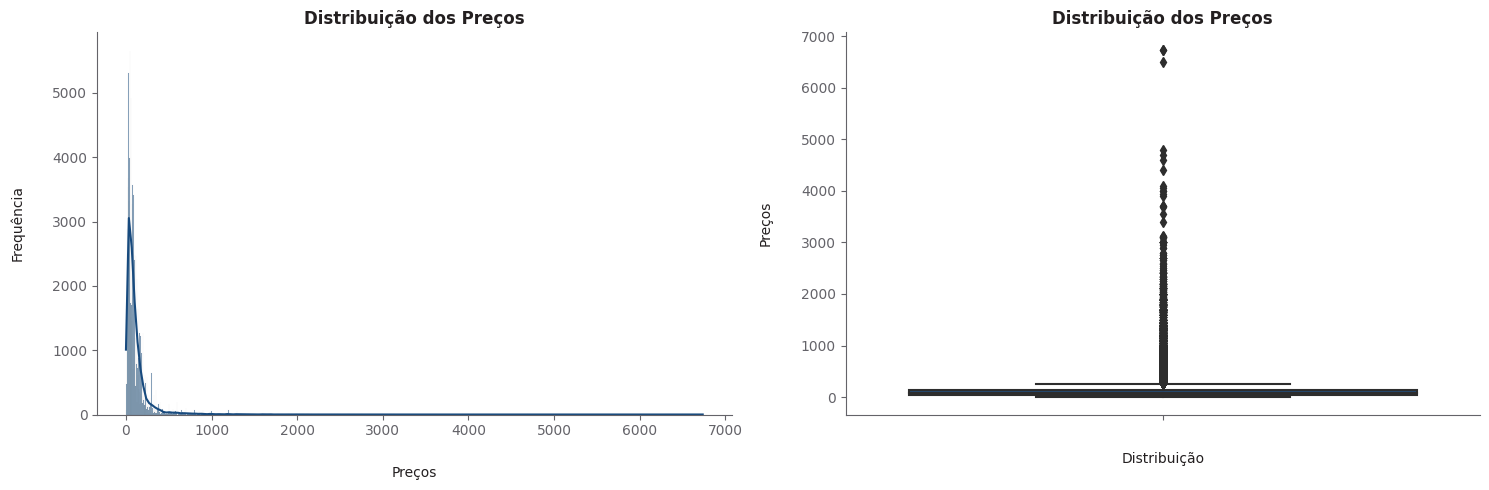

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=item_data, x='price', kde=True, ax=axes[0], color=AZUL1)
axes[0].set_title('Distribuição dos Preços', color=CINZA1, fontweight='bold')
axes[0].set_xlabel('Preços', color=CINZA1, labelpad=20)
axes[0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
axes[0].tick_params(axis='x', colors=CINZA4)
axes[0].tick_params(axis='y', colors=CINZA4)
axes[0].spines['left'].set_color(CINZA4)
axes[0].spines['bottom'].set_color(CINZA4)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

sns.boxplot(data=item_data, y='price', ax=axes[1], color=AZUL1, orient='v')
axes[1].set_title('Distribuição dos Preços', color=CINZA1, fontweight='bold')
axes[1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[1].set_ylabel('Preços', color=CINZA1, labelpad=20)
axes[1].tick_params(axis='x', colors=CINZA4)
axes[1].tick_params(axis='y', colors=CINZA4)
axes[1].spines['left'].set_color(CINZA4)
axes[1].spines['bottom'].set_color(CINZA4)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Como é possível ver, os preços levam uma distribuição assimétrica à direita, com vários outliers. Especialmente, há outliers com preços além de 6000 reais bem distantes dos outros, vamos investigá-los abaixo.

In [103]:
item_data.loc[item_data['price'] > 6000]

,order_id,order_purchase_timestamp,product_id,price,customer_unique_id,customer_city,customer_state,product_category_name
38925,f5136e38d1a14a4dbd87dff67da82701,2017-05-24 18:14:34,1bdf5e6731585cf01aa8169c7028d6ad,6499.0,ff4159b92c40ebe40454e3e6a7c35ed6,marilia,SP,artes_e_artesanato
78422,0812eb902a67711a1cb742b3cdaa65ae,2017-02-12 20:37:36,489ae2aa008f021502940f251d4cce7f,6735.0,dc4802a71eae9be1dd28f5d788ceb526,campo grande,MS,casa_e_moveis
84179,fefacc66af859508bf1a7934eab1e97f,2018-07-25 18:10:17,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,459bef486812aa25204be022145caa62,vitoria,ES,informatica


Como não tenho certeza se são dados incoerentes, e é plenamente possível existirem produtos com esse preço, irei deixá-los.

#### 3.4 Qual o valor médio pago por pedido?

In [104]:
order_data['payment_value'].describe().to_frame()

,payment_value
count,99440.000000
mean,160.990267
std,221.951257
min,0.000000
25%,62.010000
50%,105.290000
75%,176.970000
max,13664.080000


- O valor médio pago por pedido é de aproximadamente 161 reais.
- Esse valor pode variar bastante, com um desvio padrão de 222. 
- O valor pago deve seguir uma distribuição assimétrica à direita, considerando que a média é maior que a mediana e observando os valores mínimo e máximo. 
- Considerando o IQR, 50% dos valores pagos em pedidos estão entre 62 reais e 177 reais.
- Pedidos com valor pago igual a zero podem representar compras canceladas, portanto, irei removê-los. São apenas 3 observações, portanto, as medidas de interesse aqui não serão afetadas.

In [105]:
pmt_zero = order_data.loc[order_data['payment_value'] == 0].index
order_data.drop(pmt_zero, inplace=True)

In [106]:
order_data['payment_value'].describe().to_frame()

,payment_value
count,99437.000000
mean,160.995124
std,221.952843
min,9.590000
25%,62.010000
50%,105.290000
75%,176.970000
max,13664.080000


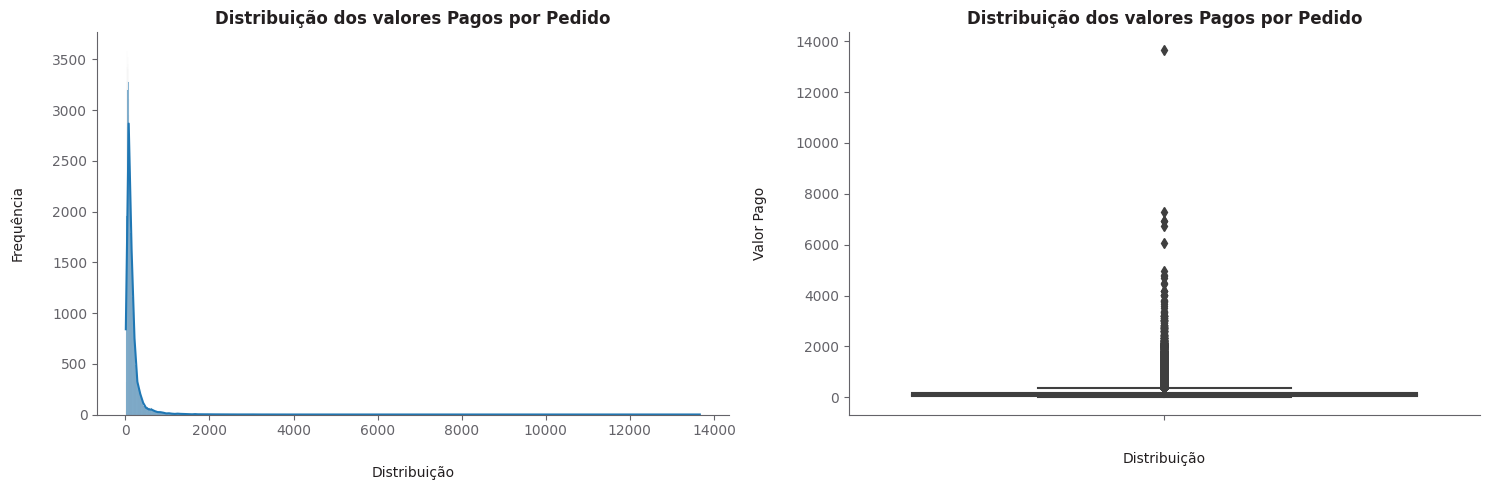

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=order_data, x='payment_value', kde=True, ax=axes[0])
axes[0].set_title('Distribuição dos valores Pagos por Pedido', color=CINZA1, fontweight='bold')
axes[0].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[0].set_ylabel('Frequência', color=CINZA1, labelpad=20)
axes[0].tick_params(axis='x', colors=CINZA4)
axes[0].tick_params(axis='y', colors=CINZA4)
axes[0].spines['left'].set_color(CINZA4)
axes[0].spines['bottom'].set_color(CINZA4)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

sns.boxplot(data=order_data, y='payment_value', ax=axes[1], orient='vertical')
axes[1].set_title('Distribuição dos valores Pagos por Pedido', color=CINZA1, fontweight='bold')
axes[1].set_xlabel('Distribuição', color=CINZA1, labelpad=20)
axes[1].set_ylabel('Valor Pago', color=CINZA1, labelpad=20)
axes[1].tick_params(axis='x', colors=CINZA4)
axes[1].tick_params(axis='y', colors=CINZA4)
axes[1].spines['left'].set_color(CINZA4)
axes[1].spines['bottom'].set_color(CINZA4)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

Como esperado, temos assimetria. Aparentemente, há um outlier que se distancia muito dos demais, vamos investigar.

In [108]:
order_data.loc[order_data['payment_value'] > 10000]

,order_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_installments,payment_value
13390,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,1.0,13664.08


In [109]:
item_data.loc[item_data['order_id'] == '03caa2c082116e1d31e67e9ae3700499']

,order_id,order_purchase_timestamp,product_id,price,customer_unique_id,customer_city,customer_state,product_category_name
66883,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66884,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66885,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66886,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66887,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66888,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66889,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia
66890,03caa2c082116e1d31e67e9ae3700499,2017-09-29 15:24:52,5769ef0a239114ac3a854af00df129e4,1680.0,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,telefonia


Aparentemente este outlier não representa informação inconsistente, apenas um cliente que fez uma série de pedidos caros de uma vez no Rio de Janeiro. Portanto, não deve ser retirado da análise. Sendo um ponto isolado dentre tantas observações, ele não irá distorcer nossas medidas de interesse.

#### 3.5 Em quantas parcelas, em média, os pedidos são parcelados?

In [110]:
order_data['payment_installments'].describe().to_frame()

,payment_installments
count,99437.000000
mean,2.980983
std,2.741830
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,29.000000


- Os pagamentos são parcelados, em média, em aproximadamente 3 parcelas.
- Esse valor pode variar, com um desvio padrão de 2.74. Ademais, observando os valores mínimo e máximo, pode-se inferir que a média é afetada por outliers - pagamentos divididos em até 29 parcelas, por exemplo.
- Analisando o IQR, 50% dos clientes parcelam de 1 a 4 vezes o pagamento.

#### 3.6 Análise bivariada

#### 3.7 Quais estados vendem mais - em número de pedidos e em valor médio pago por pedido?

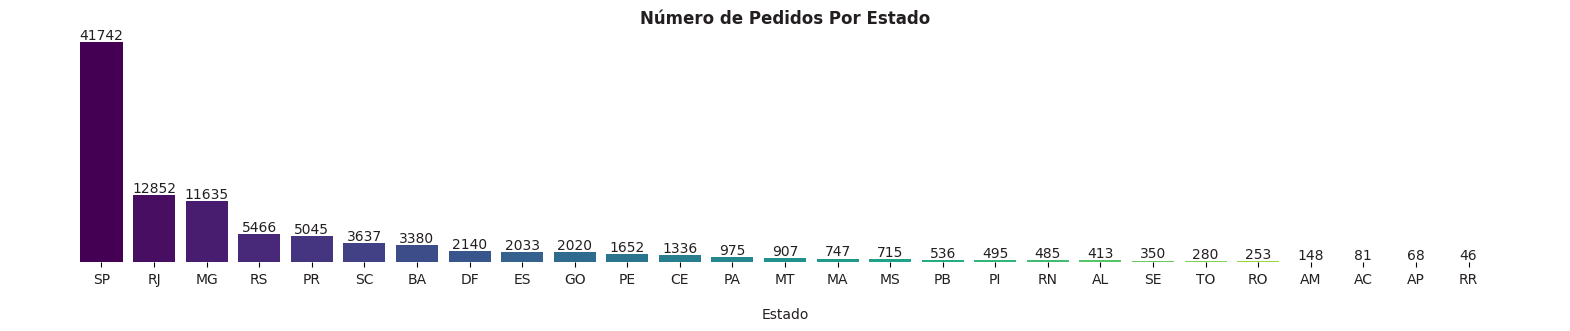

In [111]:
# Grouping the data by state, obtaining the number of orders per state.
states_orders = order_data.groupby(['customer_state'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['orders'],ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(states_orders)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_orders['customer_state'], height=states_orders['orders'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Pedidos Por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_orders['customer_state'], labels=states_orders['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Os estados do sul e sudeste lideram as vendas da Olist, com destaque para São Paulo, vendendo 3.25 vezes mais que o segundo maior vendedor (RJ) e 11.3 vezes mais que a média. Logo em seguida, temos a Bahia e o DF.

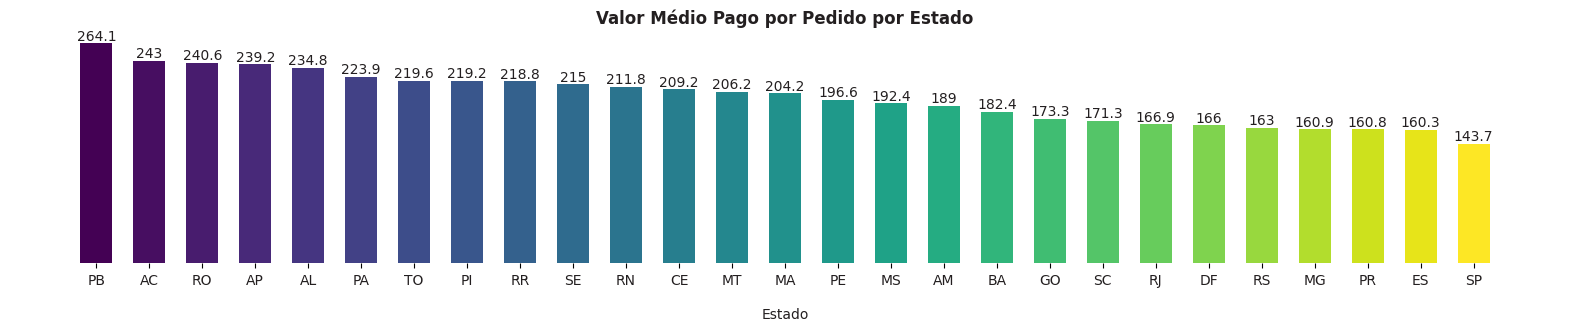

In [112]:
# Grouping the data by state, obtaining the average payment value per state.
states_pmt = order_data.groupby(['customer_state'])[['payment_value']].mean().sort_values(by=['payment_value'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(states_pmt)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=states_pmt['customer_state'], height=round(states_pmt['payment_value'], 1), color=colors, width=0.6)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Valor Médio Pago por Pedido por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=states_pmt['customer_state'], labels=states_pmt['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Estados do norte e nordeste possuem os maiores valores pagos em média por pedido. Curiosamente, São Paulo aparece em último lugar. Provavelmente porque a maioria dos pedidos é feita lá, e estes estão concentrados em valores menores, como visto na distribuição dos preços.

#### 3.8 Quais cidades vendem mais?

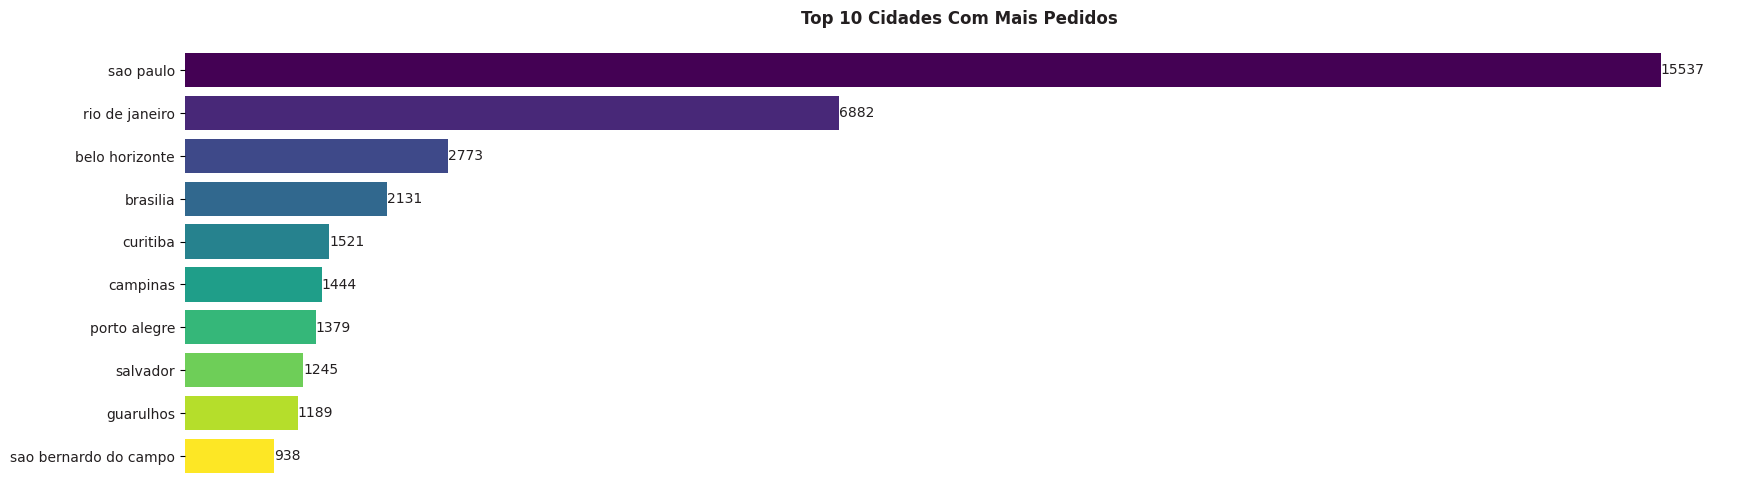

In [113]:
# Grouping the data by customer city, obtaining the number of orders per city.
cities_orders = order_data.groupby(['customer_city'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['orders'], ascending=False).reset_index().head(10)

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(cities_orders)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 6))
bars = ax.barh(y=cities_orders['customer_city'], width=cities_orders['orders'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Top 10 Cidades Com Mais Pedidos', color=CINZA1, fontweight='bold')
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=cities_orders['customer_city'], labels=cities_orders['customer_city'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Como esperado, São Paulo representa, de longe, a cidade com o maior número de pedidos, possuindo um número 4.4 vezes maior que a média das dez acima. Brasília e Salvador entram como as únicas cidades que não fazem parte de estados do sul/sudeste na lista. Especialmente, Brasília é a quarta cidade que mais vende.

#### 3.9 Quais as categorias de item mais vendidas?

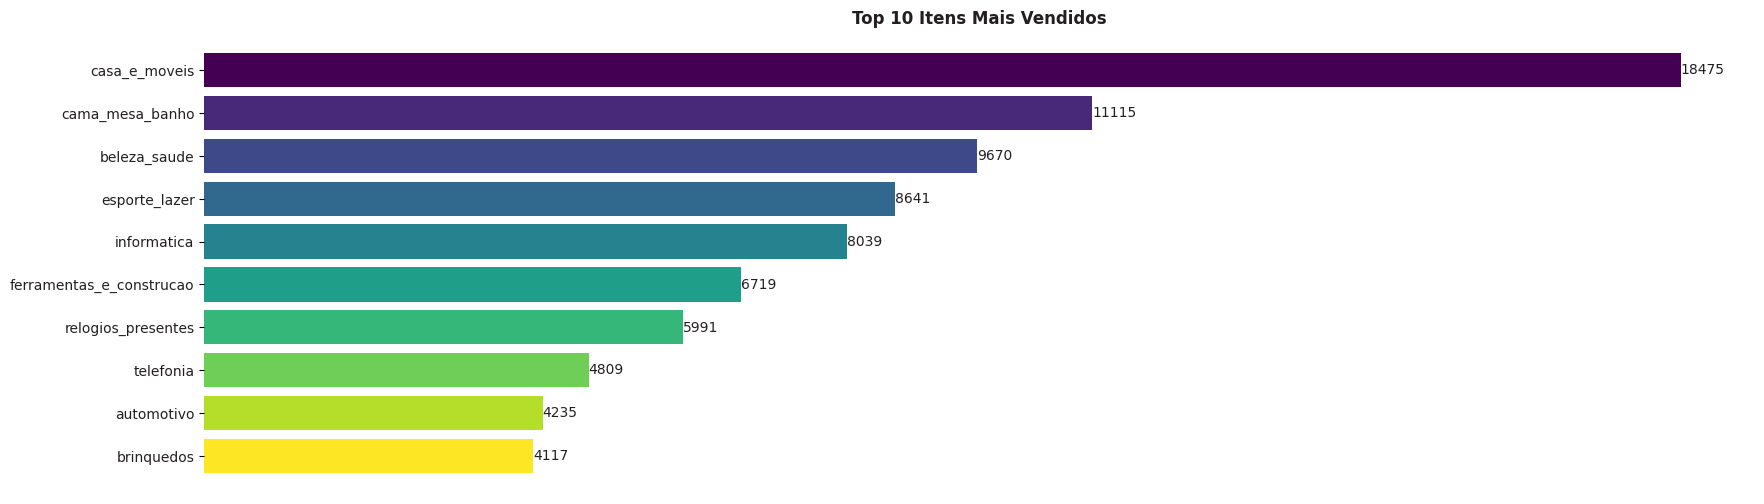

In [114]:
# Grouping the data by product category, obtaining the number of products sold per category.
category_items = item_data.groupby(['product_category_name'])[['product_id']].count().rename(columns={'product_id': 'items'}).sort_values(by=['items'], ascending=False).reset_index().head(10)

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(category_items)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 6))
bars = ax.barh(y=category_items['product_category_name'], width=category_items['items'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Top 10 Itens Mais Vendidos', color=CINZA1, fontweight='bold')
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=category_items['product_category_name'], labels=category_items['product_category_name'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Acima podemos ver os produtos mais vendidos, com "casa_e_moveis" sendo, de longe, a categoria mais vendida. É possível notar que realmente a Olist engloba vendedores dos mais diversos tipos de produtos.

#### 3.10 Quais as três categorias de item mais vendidas por região do país?

In [115]:
def define_regions(x):
    if x in set(['RS', 'SC', 'PR']):
        return 'Sul'
    elif x in set(['SP', 'RJ', 'MG', 'ES']):
        return 'Sudeste'
    elif x in set(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']):
        return 'Nordeste'
    elif x in set(['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']):
        return 'Norte'
    else:
        return 'Centro-Oeste'


# Grouping the data by region, obtaining the top 3 most bought product categories.
item_data['region'] = item_data['customer_state'].apply(define_regions)

regions_items= item_data.groupby(['region', 'product_category_name'])[['product_id']].count().rename(columns={'product_id': 'products'}).reset_index()
regions_items = regions_items.sort_values(by=['region', 'products'], ascending=[True, False]).reset_index(drop=True)

centro_oeste = regions_items.loc[regions_items['region'] == 'Centro-Oeste'].head(3)
norte = regions_items.loc[regions_items['region'] == 'Norte'].head(3)
nordeste = regions_items.loc[regions_items['region'] == 'Nordeste'].head(3)
sul = regions_items.loc[regions_items['region'] == 'Sul'].head(3)
sudeste = regions_items.loc[regions_items['region'] == 'Sudeste'].head(3)

regions_items = pd.concat([centro_oeste, nordeste, norte, sudeste, sul]).set_index('region')
regions_items

,product_category_name,products
region,,
Centro-Oeste,casa_e_moveis,934
Centro-Oeste,beleza_saude,630
Centro-Oeste,cama_mesa_banho,578
Nordeste,casa_e_moveis,1328
Nordeste,beleza_saude,1139
Nordeste,informatica,788
Norte,casa_e_moveis,250
Norte,beleza_saude,212
Norte,informatica,184


"casa_e_moveis" se mantém a categoria de produto mais vendida em todas as regiões, seguida por "beleza_saude" e/ou "cama_mesa_banho". No entanto, é interessante observar como categorias como "informatica" também prevalecem no norte e no nordeste e "esporte_lazer" no sul.

#### 3.11 Quais as categorias de item mais caras e mais baratas em média?

In [116]:
# Grouping the data by unique products categories, obtaining the average price of the most expensive and cheaper categories.
unique_products = item_data.drop_duplicates(subset='product_id', ignore_index=True)
expensive_products = unique_products.groupby(['product_category_name'])[['price']].mean().sort_values(by=['price'], ascending=False).reset_index().head(10)
cheap_products = unique_products.groupby(['product_category_name'])[['price']].mean().sort_values(by=['price'], ascending=True).reset_index().head(10)

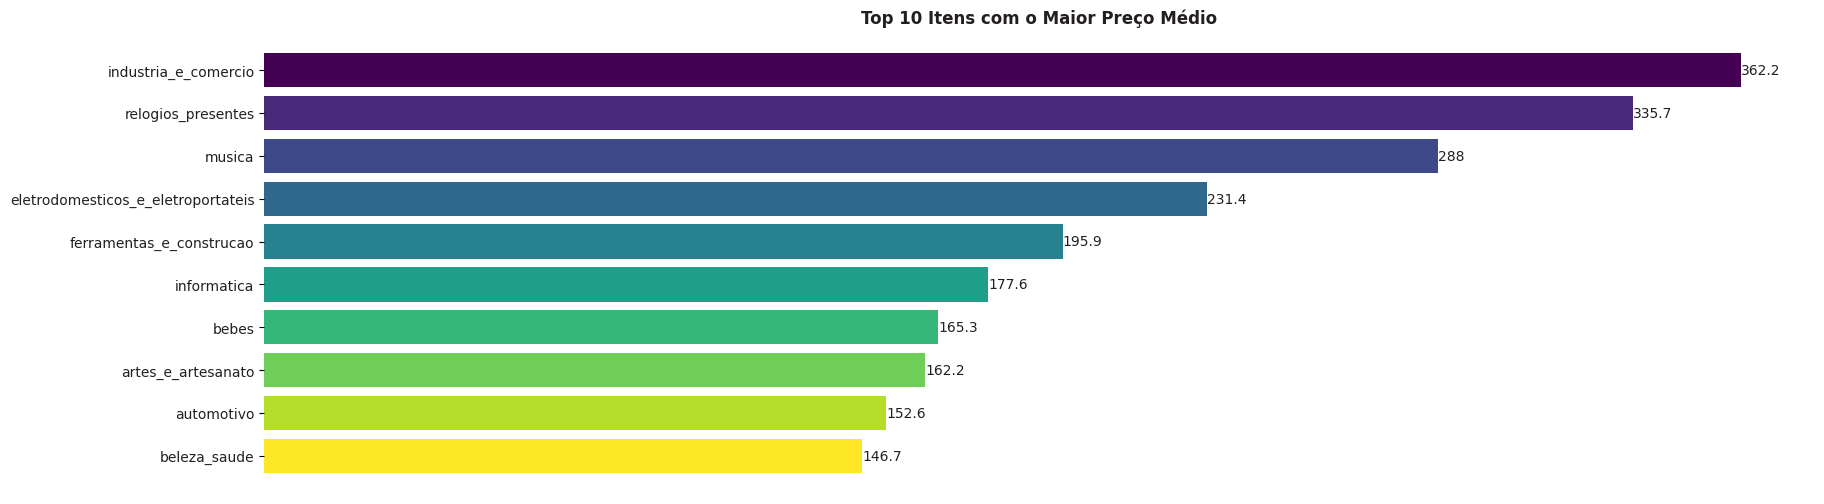

In [117]:
# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(expensive_products)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 6))
bars = ax.barh(y=expensive_products['product_category_name'], width=round(expensive_products['price'], 1), color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Top 10 Itens com o Maior Preço Médio', color=CINZA1, fontweight='bold')
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=expensive_products['product_category_name'], labels=expensive_products['product_category_name'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Itens da industria e comércio detêm o maior preço médio dentre todas as categorias. Ademais, de forma interessante, música configura a terceira categoria com o maior preço médio.

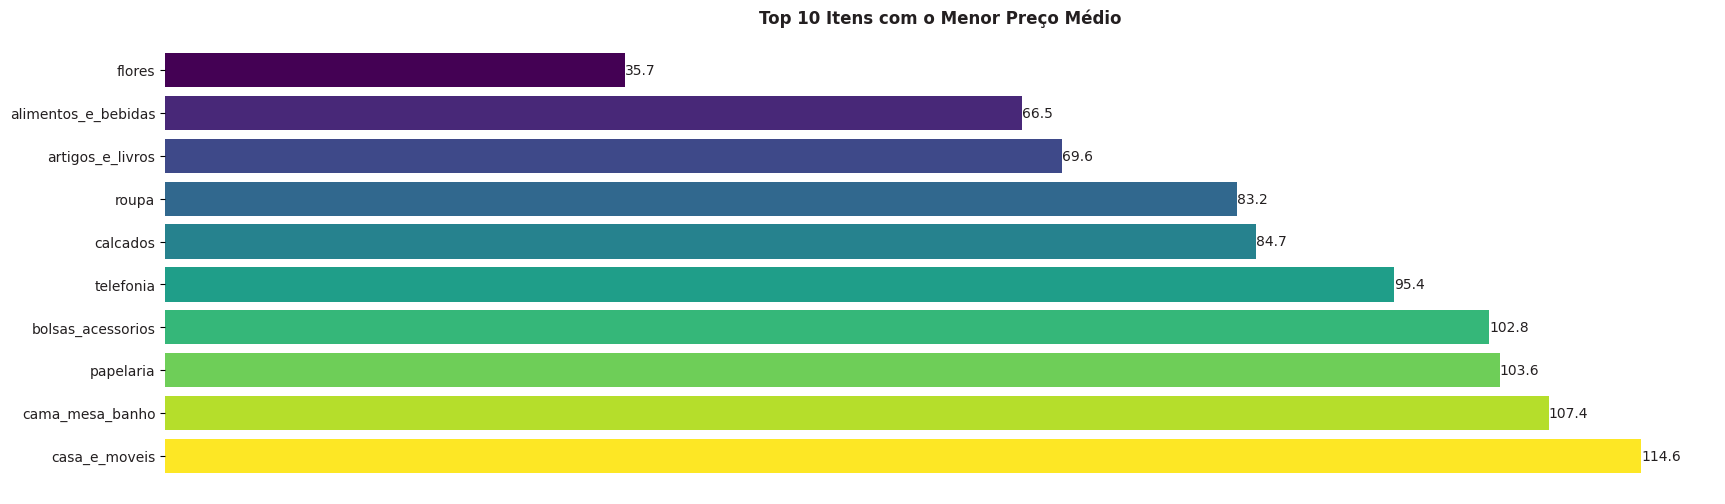

In [118]:
# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(expensive_products)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 6))
bars = ax.barh(y=cheap_products['product_category_name'], width=round(cheap_products['price'], 1), color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Top 10 Itens com o Menor Preço Médio', color=CINZA1, fontweight='bold')
ax.get_xaxis().set_visible(False)
ax.set_yticks(ticks=cheap_products['product_category_name'], labels=cheap_products['product_category_name'], color=CINZA1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()

Acima, podemos ver os itens mais baratos, sendo flores a categoria de item com o menor preço médio.

#### 3.12 Qual o número médio de itens por pedido?

In [119]:
# Grouping the data by order, counting the number of products. Then obtaining descriptive statistics it.
orders_items = item_data.groupby(['order_id'])[['product_id']].count().rename(columns={'product_id': 'products'}).reset_index()
orders_items['products'].describe().to_frame()

,products
count,93150.000000
mean,1.144069
std,0.543037
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


Os clientes compram, em média, 1.14 itens por pedido. Observando os percentis, 75% dos pedidos englobam apenas 1 item.

#### 3.13 Onde estão localizados os clientes?

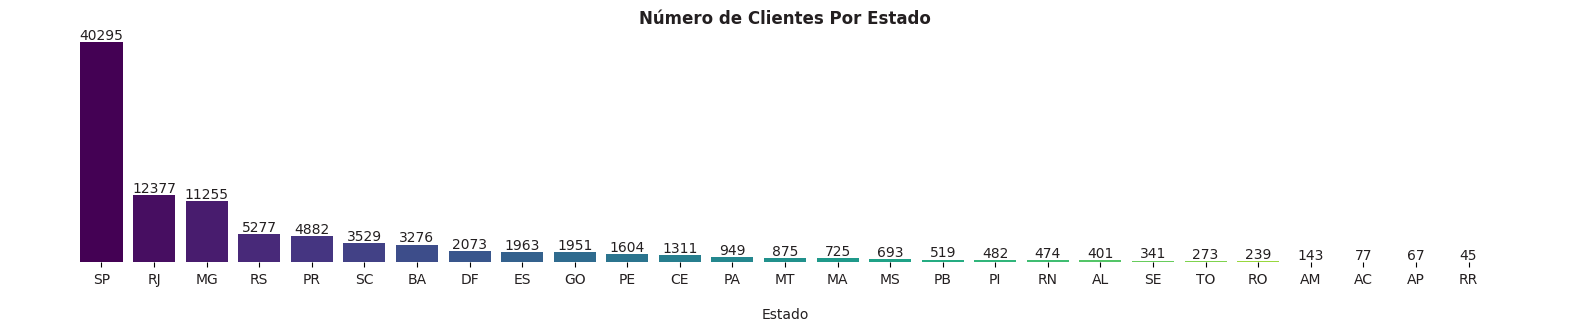

In [120]:
# Grouping the data by state, obtaining the number of customers per state.
unique_customers = customer_data.drop_duplicates(subset='customer_unique_id', ignore_index=True)
unique_customers = unique_customers.groupby(['customer_state'])[['customer_unique_id']].count().rename(columns={'customer_unique_id': 'customers'}).sort_values(by=['customers'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_customers)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=unique_customers['customer_state'], height=unique_customers['customers'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Clientes Por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=unique_customers['customer_state'], labels=unique_customers['customer_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

O número de clientes por estado tende a seguir a mesma distribuição do número de pedidos. A maioria dos clientes se encontra em estados do sul e sudeste, sendo a Bahia e o DF estados de outras regiões também com uma quantidade significativa.

#### 3.14 Onde estão localizados os vendedores?

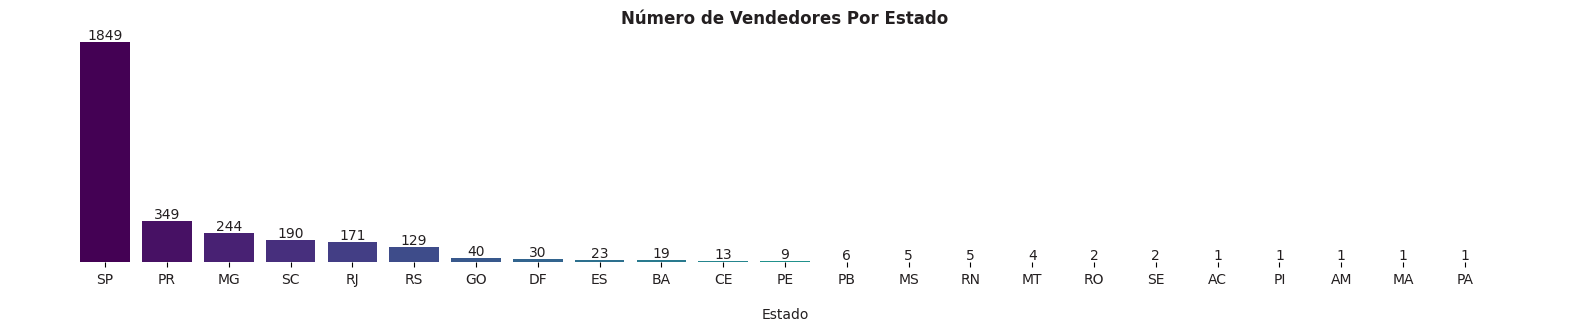

In [121]:
# Grouping the data by state, obtaining the number of sellers per state.
state_sellers = sellers.groupby(['seller_state'])[['seller_id']].count().rename(columns={'seller_id': 'sellers'}).sort_values(by=['sellers'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(state_sellers)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(20, 3))
bars = ax.bar(x=state_sellers['seller_state'], height=state_sellers['sellers'], color=colors)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Vendedores Por Estado', color=CINZA1, fontweight='bold')
ax.set_xlabel('Estado', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=state_sellers['seller_state'], labels=state_sellers['seller_state'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Da mesma forma que o número de clientes, a imensa maioria dos vendedores encontra-se em São Paulo e nos estados do sul e sudeste.

#### 3.15 Qual o número médio de parcelas no pagamento, por região?

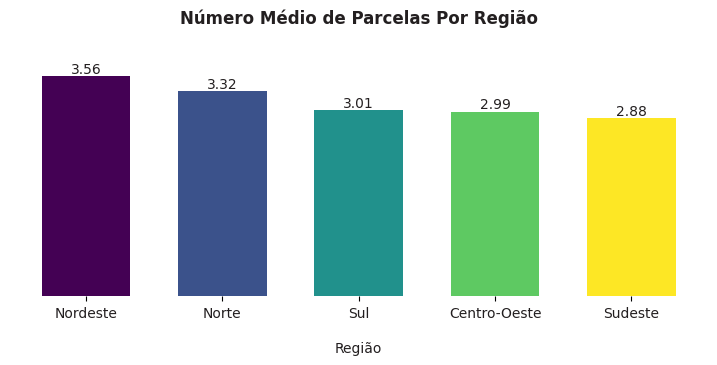

In [122]:
# Grouping the data by region, obtaining the average payment installments.
order_data['region'] = order_data['customer_state'].apply(define_regions)
regions_installments = order_data.groupby(['region'])[['payment_installments']].mean().sort_values(by=['payment_installments'], ascending=False).reset_index()

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(regions_installments)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(9, 3))
bars = ax.bar(x=regions_installments['region'], height=round(regions_installments['payment_installments'], 2), color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número Médio de Parcelas Por Região', color=CINZA1, fontweight='bold', pad=30)
ax.set_xlabel('Região', labelpad=15, color=CINZA1)
ax.set_xticks(ticks=regions_installments['region'], labels=regions_installments['region'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

É possível perceber que, majoritariamente, estados do Nordeste apresentam um maior número de parcelas (em média), ao pagar um pedido, seguidos por estados do Norte do país. Embora essa diferença não seja grande, isso pode indicar um perfil de renda e consumo dos clientes dessas regiões. 

#### 3.16 Como se dá a evolução das vendas ao longo do tempo?
- Aqui, uma vez que temos o valor pago para cada pedido realizado e a data em que foi feito esse pedido, irei obter a data no formato ano-mes e agrupar por data somando o valor pago e contando o número de pedidos, acessando a evolução das vendas ao longo do tempo (número de vendas e valor pago).
- Irei desconsiderar os meses de setembro e outubro de 2018 pois temos pouquíssimos pedidos comparados aos meses anteriores. Provavelmente isso ocorre pela ausência de dados, e não de fato pela ausência de pedidos. Então, tomarei essa medida para não distorcer a análise e a informação que pretendo passar.

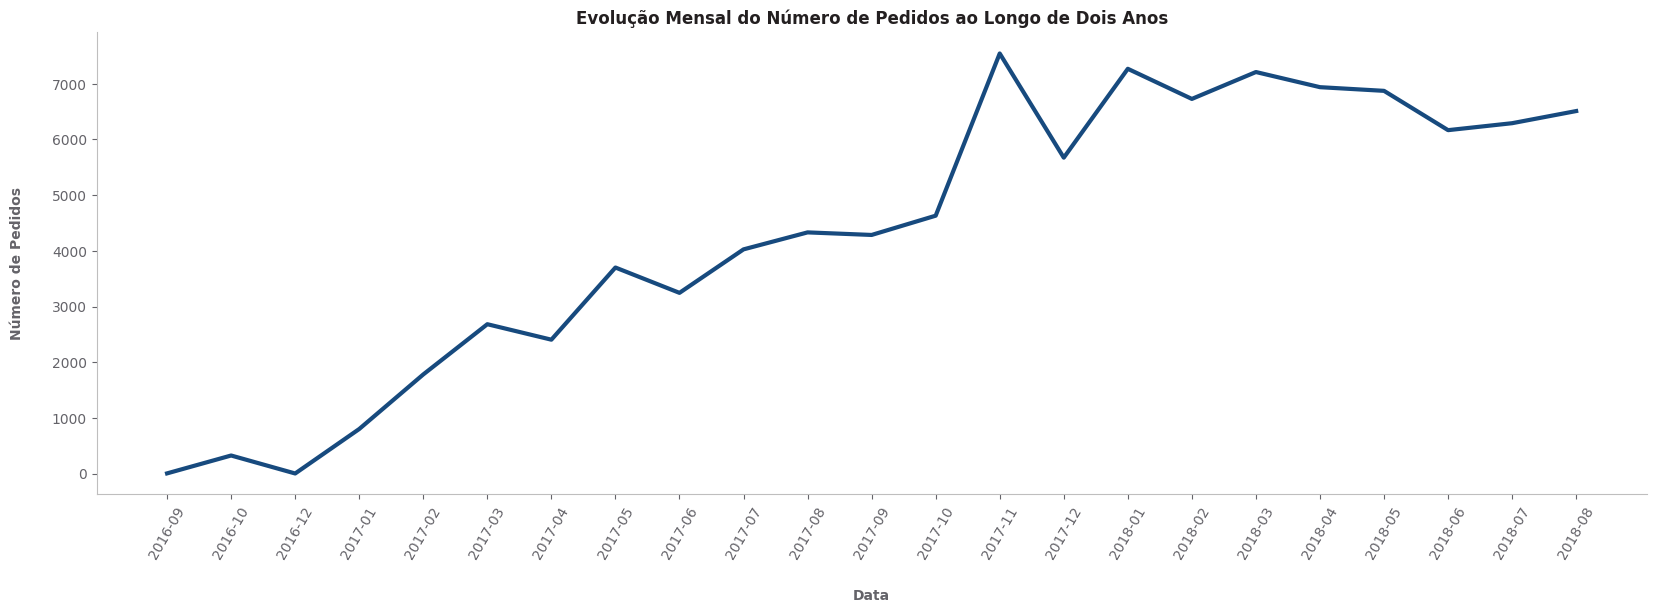

In [123]:
# Grouping the data by date, obtaining the number of orders per date over the two-year period.
order_data['year_month'] = order_data['order_purchase_timestamp'].dt.strftime(date_format='%Y-%m')
orders_monthly = order_data.groupby(['year_month'])[['order_id']].count().rename(columns={'order_id': 'orders'}).reset_index().sort_values(by=['year_month'])
orders_monthly = orders_monthly.loc[~orders_monthly['year_month'].isin(['2018-09', '2018-10'])]

# Defining the figure and plotting the line chart.
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(orders_monthly['year_month'], orders_monthly['orders'], color=AZUL1, linewidth=3)

# Customizing the plot.
ax.set_title('Evolução Mensal do Número de Pedidos ao Longo de Dois Anos', fontweight='bold', color=CINZA1)
ax.set_xlabel('Data', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_monthly['year_month'], labels=orders_monthly['year_month'], rotation=60)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

De forma geral, as vendas tendem a crescer ao longo dos anos, atingido seu pico em novembro de 2017. Ademais, de forma interessante, em 2017 as vendas caem de novembro para dezembro, subindo novamente de dezembro para janeiro de 2018.

#### 3.17 Como se dá a evolução das vendas ao longo do dia? Em quais horários são feitos mais pedidos?

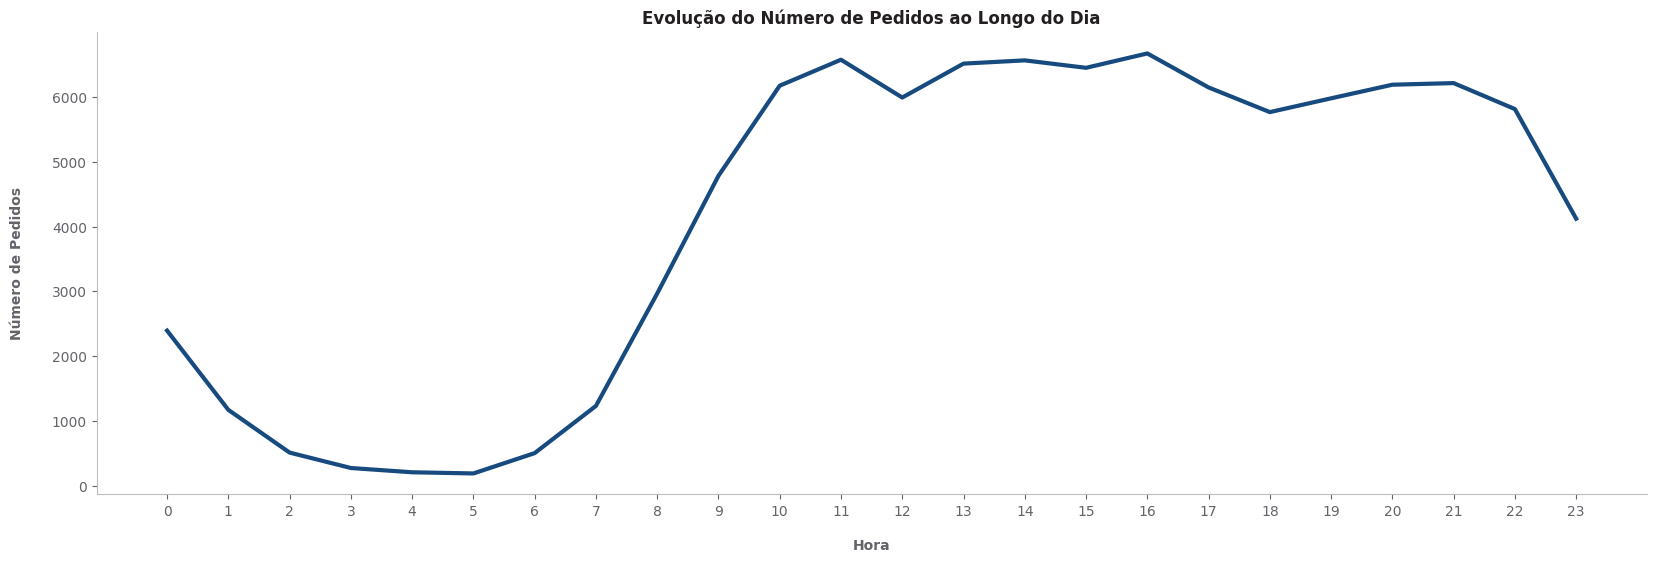

In [124]:
# Grouping the data by hour, obtaining the number of orders per hour.
order_data['hour'] = order_data['order_purchase_timestamp'].dt.hour
orders_hourly = order_data.groupby(['hour'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['hour'], ascending=True).reset_index()

# Defining the figure and plotting the line chart.
fig, ax = plt.subplots(figsize=(20, 6))

# Customizing the plot.
ax.set_title('Evolução do Número de Pedidos ao Longo do Dia', color=CINZA1, fontweight='bold')
ax.plot(orders_hourly['hour'], orders_hourly['orders'], color=AZUL1, linewidth=3)
ax.set_xlabel('Hora', labelpad=15, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=20, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_hourly['hour'], labels=orders_hourly['hour'], color=CINZA1)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

É possível perceber que um maior número de pedidos é feito no período entre a manhã e a tarde, entre 10h e 16h. Os picos de venda ocorrem em volta das 16h e das 11h.

#### 3.18 Como se dá a evolução das vendas ao longo da semana? Em quais dias da semana são feitos mais pedidos?

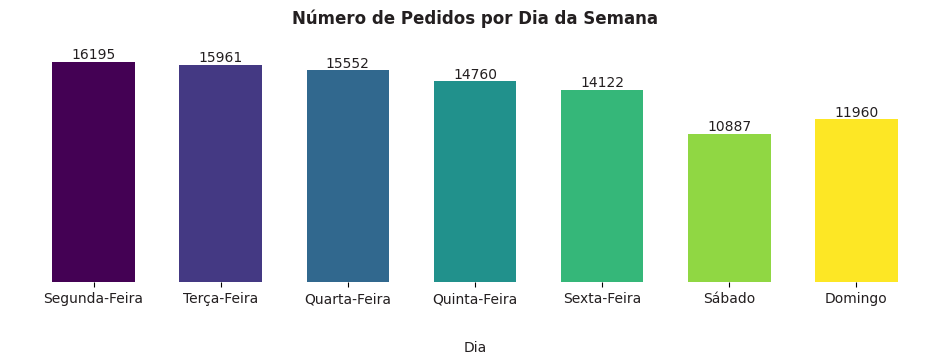

In [125]:
# Grouping the data by day of week, obtaining the number of orders per day.
order_data['day'] = order_data['order_purchase_timestamp'].dt.dayofweek
orders_daily = order_data.groupby(['day'])[['order_id']].count().rename(columns={'order_id': 'orders'}).sort_values(by=['day'], ascending=True).reset_index()
orders_daily['day'] = orders_daily['day'].map({0: 'Segunda-Feira', 1: 'Terça-Feira', 2: 'Quarta-Feira', 3: 'Quinta-Feira', 4: 'Sexta-Feira', 5: 'Sábado', 6: 'Domingo'})

# Defining the bars colors.
colors = plt.cm.viridis(np.linspace(0, 1, len(orders_daily)))

# Defining the figure and plotting the bar chart.
figure, ax = plt.subplots(figsize=(12, 3))
bars = ax.bar(x=orders_daily['day'], height=orders_daily['orders'], color=colors, width=0.65)

# Putting labels at the top of the bars.
ax.bar_label(bars, color=CINZA1)

# Customizing the plot.
ax.set_title('Número de Pedidos por Dia da Semana', color=CINZA1, fontweight='bold', y=1.08)
ax.set_xlabel('Dia', labelpad=25, color=CINZA1)
ax.set_xticks(ticks=orders_daily['day'], labels=orders_daily['day'], color=CINZA1)
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

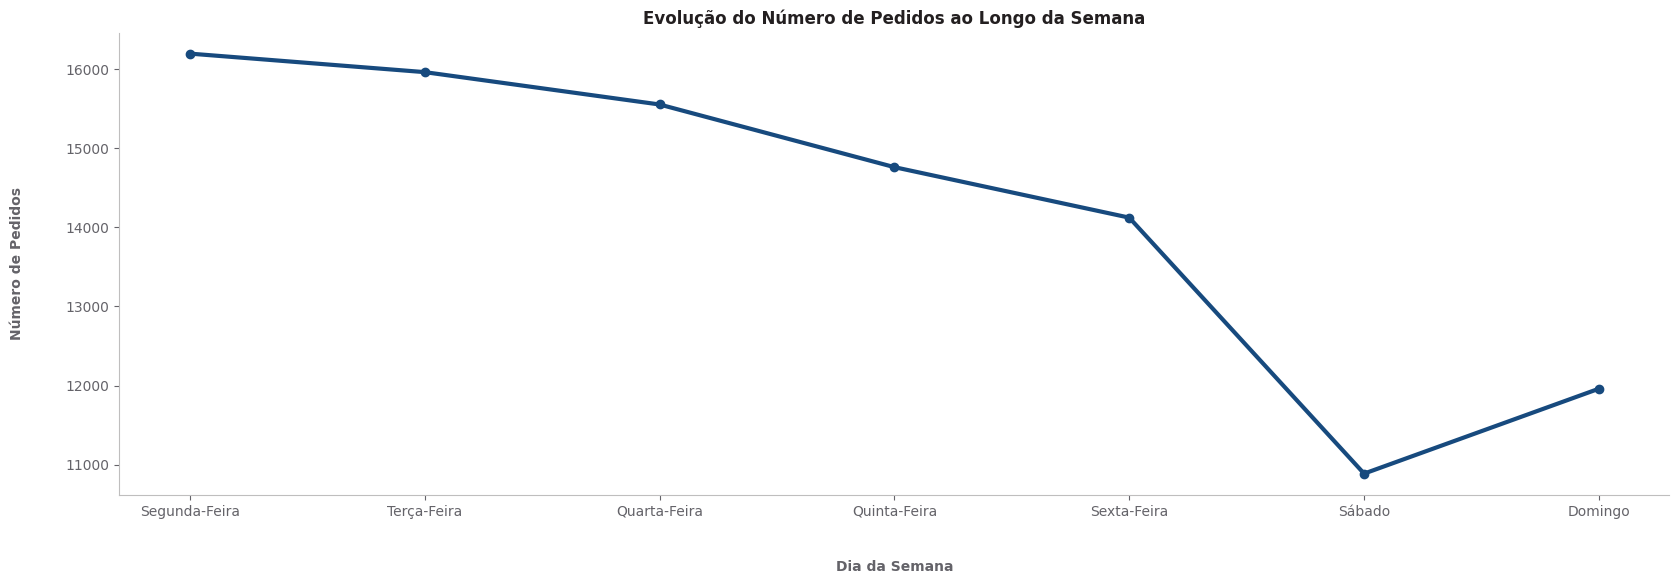

In [126]:
# Defining the figure and plotting the line chart.
fig, ax = plt.subplots(figsize=(20, 6))

# Customizing the plot.
ax.set_title('Evolução do Número de Pedidos ao Longo da Semana', color=CINZA1, fontweight='bold')
ax.plot(orders_daily['day'], orders_daily['orders'], color=AZUL1, linewidth=3, marker='o')
ax.set_xlabel('Dia da Semana', labelpad=30, color=CINZA4, fontweight='bold')
ax.set_ylabel('Número de Pedidos', labelpad=30, color=CINZA4, fontweight='bold')
ax.set_xticks(ticks=orders_daily['day'], labels=orders_daily['day'], color=CINZA1)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

É possível observar que o número de pedidos tende a cair um pouco com o passar da semana, sendo segunda-feira o dia com mais pedidos.

#### 3.19 Análise multivariada

#### 3.20 Existe alguma correlação entre o valor pago em um pedido e o número de parcelas escolhido para o pagamento?

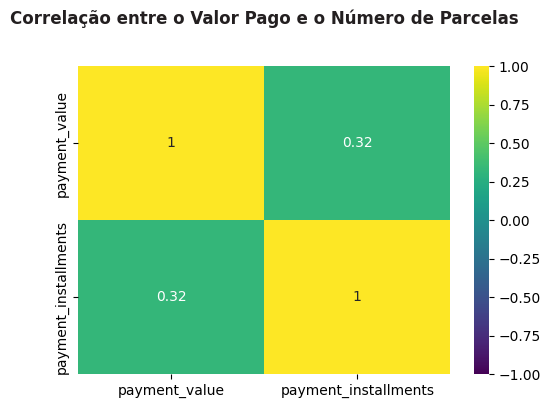

In [127]:
# Obtaining the correlation between the value payed and the number of installments.
pmt_inst_corr = order_data[['payment_value', 'payment_installments']].corr()

# Plotting the heatmap of correlation.
plt.figure(figsize=(6, 4))
sns.heatmap(data=pmt_inst_corr, annot=True, vmin=-1, vmax=1, cmap='viridis')
plt.title('Correlação entre o Valor Pago e o Número de Parcelas', fontweight='bold', color=CINZA1, pad=30)
plt.show()

O valor pago em um pedido e o número de parcelas apresentam uma correlação positiva moderada. Isso indica que, moderadamente, quanto maior o valor de um pedido, maior o número de parcelas, e vice-versa. A fim de confirmar se isso é verdade, vamos visualizar o scatterplot abaixo.

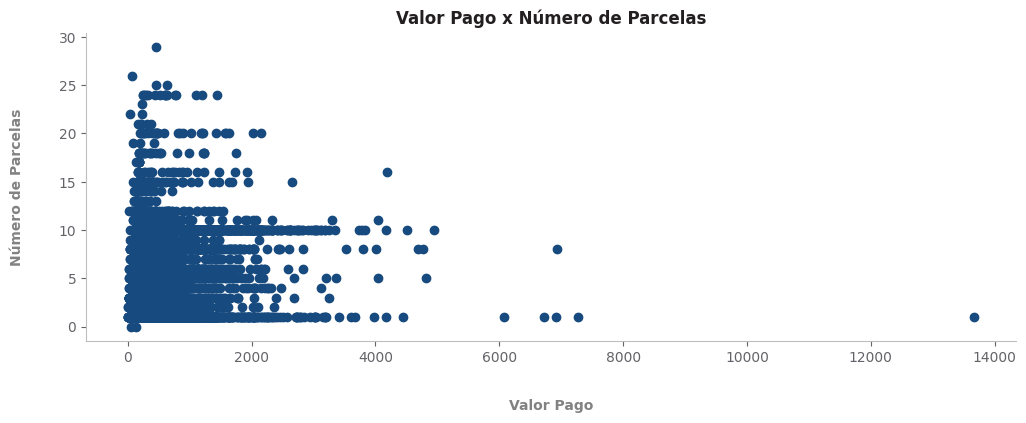

In [128]:
# Defining the figure and plotting the scatterplot.
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x=order_data['payment_value'], y=order_data['payment_installments'], color=AZUL1)

# Customizing the plot.
ax.set_title('Valor Pago x Número de Parcelas', color=CINZA1, fontweight='bold')
ax.set_xlabel('Valor Pago', color=CINZA6, fontweight='bold', labelpad=25)
ax.set_ylabel('Número de Parcelas', color=CINZA6, fontweight='bold', labelpad=25)
ax.tick_params(axis='y', colors=CINZA4)
ax.tick_params(axis='x', colors=CINZA4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(CINZA9)
ax.spines['bottom'].set_color(CINZA9)

plt.show()

Observando o gráfico de dispersão, é possível concluir que não há uma associação significativa entre essas duas variáveis.

#### Conclusões
1. Contextualizei, defini as perguntas de negócio.
2. Carreguei os dados
3. Dei merge em tabelas do nosso interesse 
4. Limpei 
- Acessei heads e tails, tipos dos dados, dimensões, valores nulos e duplicados.
- Tratei valores nulos, limpei categoria de produtos com domínios que poderiam ser unidos.
5. Explorei os dados
- Analisei estatísticas descritivas, distribuições e outliers para algumas variáveis numéricas (análise univariada).
- Analisei os dados realizando agregações por estado, região, pedido (análise bivariada), etc.
- Analisei correlações e gráficos de dispersão (análise multivariada).
6. Analisar notebook do tiago. Ajustar coisas nas visualizações e gráficos feitos.
7. Perguntas de negócio novas:
- Qual o frete médio pago pelos clientes? Em quais regiões se paga um maior frete e um menor frete?
- Qual o tempo médio para os pedidos serem entregues? Em quais regiões os pedidos são entregues mais rápido ou demoram mais para chegar?
- Analisar o review score. Qual o número total de pedidos por review score? Quais são os estados com maior e menor review score?
- Essas alterações entrarão no valor do frete.